In [18]:
import requests
from IPython.core.display import HTML


# Gradient image features: Histogram of Oriented Gradients (HoG) introduction
This exercise is about the extraction of gradient features from images. It offers an introduction and application of HoG features on a sample image.
The HOG features will be used in the exercises next week for classification.

<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#descriptor">Task 1: Calculate the HOG descriptor</a>
            </li>
            <li>
            <a href="#test">Task 2: Visualizing and understanding the HOG de…</a>
            </li>
            <li>
            <a href="#compare_images">Task 3: Comparing Hog Features</a>
            </li>
            <li>
            <a href="#interpretation">Task 4: Interpretation/ Understanding questions</a>
            </li>
        </ul>
    </div>
</article>

The cell below loads a sample image.


(480, 852, 3)


Text(0.5, 1.0, 'Input image')

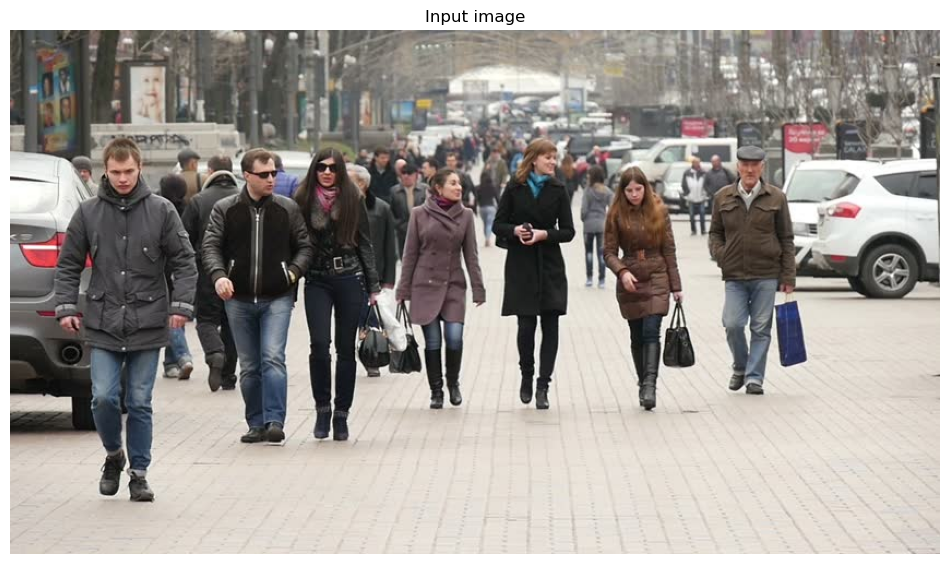

In [19]:
## load input image
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from skimage import data, exposure


fn =  "./data/people01.jpg"
image = plt.imread(fn)
print(image.shape)

fig, ax1 = plt.subplots(figsize=(12, 8), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

In the following section: 
- you are introduced to the [HOG descriptor](https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients)

- shown how to calculate a HoG featues for an image including a visualization of the HoG descriptor.

## Overview of Histogram of Oriented Gradients (HOG) Algorithm
The Histogram of Oriented Gradients (HOG) is a feature descriptor used in computer vision to detect objects. 
The function [skimage.feature.hog](https://scikit-image.org/docs/stable/api/skimage.feature.html<elem-2>.feature.hog)
 computes
the HOG features. It also returns the feature descriptor vector (`fd`
), in which its
size is equal to the number of: Bins $\times$ Block Columns
$\times$ Block Rows $\times$ Cells in the Block.
The process involves the following stages:
**1. Preprocessing / Smoothing:**


Initially, the image undergoes a global intensity normalization — a procedure that diminishes the effects of lighting. A common technique involves gamma (power-law) compression, which can be achieved by calculating the square root or logarithm of each color channel. This stage helps in reducing the impact of local shadowing and highlights variations since the image texture strength is generally related to the local surface illumination.
**2. Calculation of Image Gradients:**


This stage focuses on computing image gradients. The standard procedure is to either convert the image to grayscale or use the most prominent color channel. 
**Info**
This step was implemented by us in the first part of the exercise.

 
**3. Creation of Cells and Calculation of normalized Histograms:**


The objective here is to create an encoding of local gradients. This involves partitioning the image window into smaller spatial cells. Each cell creates a histogram of image gradient orientations and performs various steps to normalize intensities and histograms. 
**4. Compilation of Feature Vector:**


The HOG feature is constructed by concatenating the histograms for each cell into one final HOG feature descriptor (vector). 

---
**Task 1 (easy): Calculate the HOG descriptor👩‍💻**
1. Run the cell below to calculate and plot the HOG descriptor. 


---

(270, 220, 3)


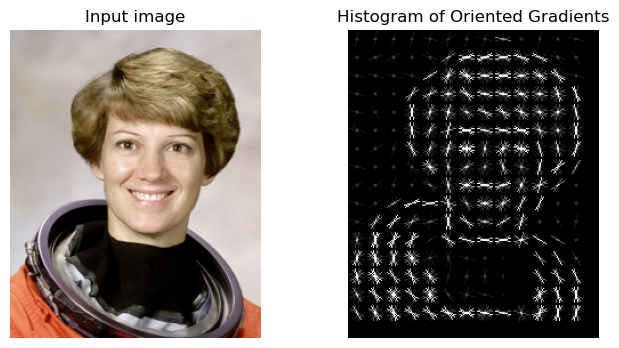

In [20]:
# load new image
image1 = data.astronaut()[:270,100:320]
print(image1.shape)

feature_vector=True,
bins = 8 
pixels_per_cell = 16
cells_per_block = 4 

(fd1, hog_feat1) = hog(
    image1,
    orientations=bins,
    pixels_per_cell=(pixels_per_cell, pixels_per_cell),
    cells_per_block=(cells_per_block, cells_per_block),
    block_norm="L2",
    visualize=True,
    feature_vector=True,
    channel_axis=-1
)
hog_feat1 = hog_feat1.astype("uint8")


# after implementation of the HoG function, run the following plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image1, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_feat1, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()


---
**Task 2 (easy): Visualizing and understanding the HOG descriptor👩‍💻**
Change the parameters of the HOG descriptor and visualize how the feature descriptor changes.
1. Change the parameters for the HOG descriptor:

- the number of bins
- the number of pixels per cell
- the number of cells per block

and visually observe how the dimensionality and the features change.
2. The following cell loads an image of a cat. Use the HOG descriptor on this image.


---

Image 2 shape: (270, 220, 3)


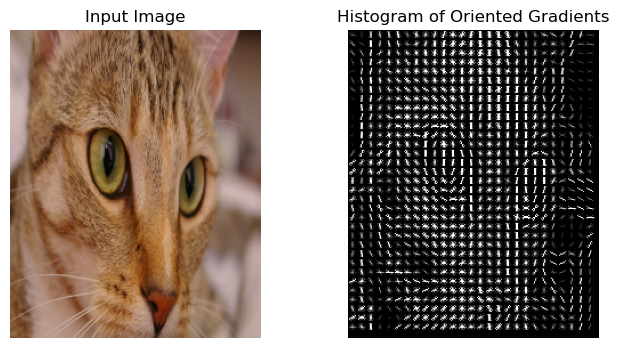

In [46]:
from skimage import data, exposure
from skimage.feature import hog
import matplotlib.pyplot as plt

# Load a new image (cat image)
image2 = data.cat()[:270, :440:2]
print("Image 2 shape:", image2.shape)

# Define parameters for the HOG descriptor
# Experiment with these parameters to observe how they affect the HOG output
bins = 9  # Number of bins for orientation histogram
pixels_per_cell = 8  # Size (in pixels) of each cell
cells_per_block = 3  # Number of cells in each block

# Compute the HOG descriptor and the HOG image
(fd2, hog_feat2) = hog(
    image2,
    orientations=bins,
    pixels_per_cell=(pixels_per_cell, pixels_per_cell),
    cells_per_block=(cells_per_block, cells_per_block),
    block_norm="L2",
    visualize=True,
    feature_vector=True,
    channel_axis=-1
)
hog_feat2 = hog_feat2.astype("uint8")

# Plotting the original and HOG image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image2, cmap=plt.cm.gray)
ax1.set_title('Input Image')

# Rescale the HOG image for better visualization
hog_image_rescaled2 = exposure.rescale_intensity(hog_feat2, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled2, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()


## Task 2 reflection

The effects of the HOG paramters:

* The bins control the number of directions we have in out histogram. Just up or down or north, north east, east etc.

* Pixels per cell control the size of each sub part of the image where we sum up the directions, such as 8x8 or 16x16.

* Cells per block doesn't seem to affect the HOG initially. But it it used later for the normalization and object detection. To detect a human of a certain size we might need blocks of similar size.

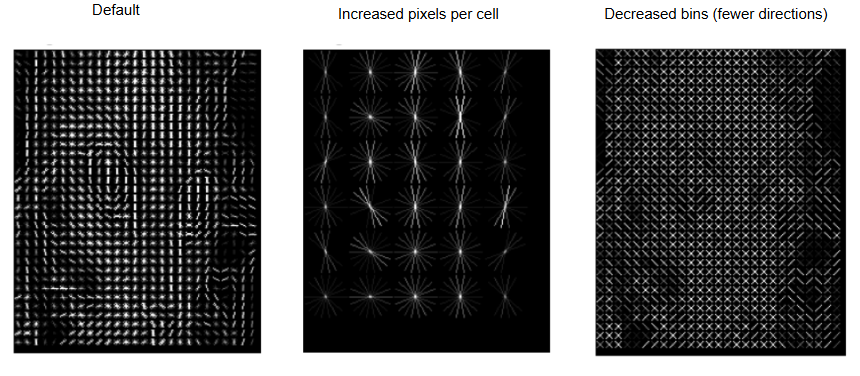


---
**Task 3 (easy): Comparing Hog Features👩‍💻**
This task will compare two HoG features of different images. 
1. For different settings visually compare the hog features
2. Calculate the normalized (use `np.linalg.norm`
 to normalize vectors) scalar product between the two feature vectors `fd1`
 and `fd2`
.     - What is the scalar product between two feature vectors? (compare it to the value of 1 )
    - Repeat the calculation for multiple HoG filter settings, notice a difference? 




**Hint**
Set `feature_vector`
=True in `hog`


3. Based on the cosine similarity (normalized inner product), explain how HoG features can be used to classify different images of cat/humans.


---

In [37]:
# Resize fd2 to match the shape of fd1 or vice versa
min_length = min(len(fd1), len(fd2))
fd1_resized = fd1[:min_length]
fd2_resized = fd2[:min_length]

# Normalize the resized feature vectors
fd1_normalized = fd1_resized / np.linalg.norm(fd1_resized)
fd2_normalized = fd2_resized / np.linalg.norm(fd2_resized)

# Calculate cosine similarity (scalar product) between the two normalized feature vectors
similarity = np.dot(fd1_normalized, fd2_normalized)
print(f'Cosine similarity between resized fd1 and fd2: {similarity:.3f}')

Cosine similarity between resized fd1 and fd2: 0.375


## Answer task 3

The closer to one the inner product between fd1 and fd2 is, the more similar the two images are in terms of shapes created by color changes.
If they are very close to one we might have two images displaying similar shapes or objects.


---
**Task 4 (medium): Interpretation/ Understanding questions💡**
Select several images from the dataset (`peopleXY.jpg`
) and visually compare the HOG features of people and non-people images. 
1. How could HoG features be used to classify different objects in a larger image with multiple people? 

2. Explain how the HOG features use local information to create an understanding of the content of the full image? 


The code in the cell below visualizes the HoG features:

---

Image shape for ./data/people01.jpg: (480, 852, 3)


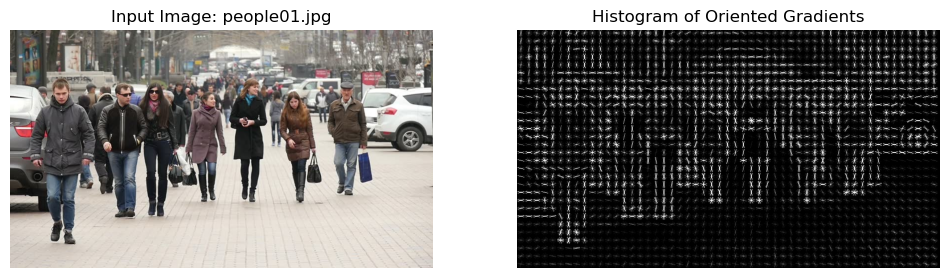

Image shape for ./data/people02.jpg: (402, 612, 3)


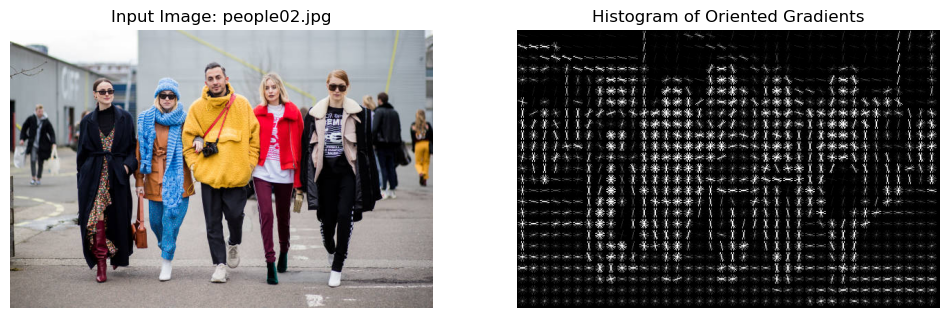

Image shape for ./data/sunflowers.jpg: (1411, 2124, 3)


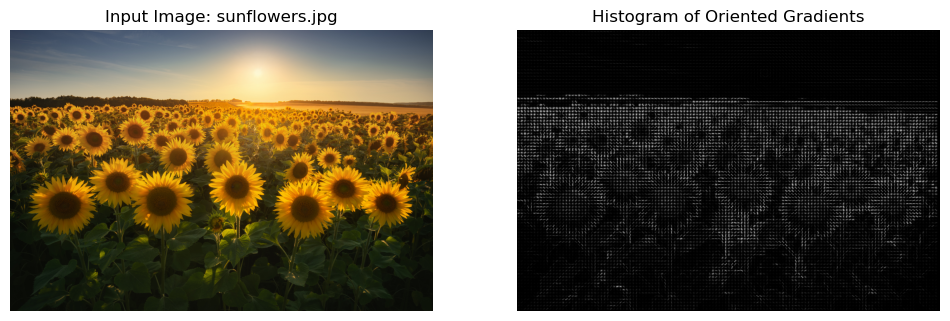

Cosine Similarity between images:
person1_person2: 0.357
person1_nonperson: 0.101
person2_nonperson: 0.122


In [50]:
import numpy as np
from skimage import exposure, io
from skimage.feature import hog
import matplotlib.pyplot as plt

# Paths to images
fn_person1 = "./data/people01.jpg"
fn_person2 = "./data/people02.jpg"
fn_nonperson = "./data/sunflowers.jpg"
images = [fn_person1, fn_person2, fn_nonperson]

# HOG parameters
bins = 8
pixels_per_cell = 16
cells_per_block = 4

# Store feature descriptors
feature_descriptors = []

# Compute HOG features for each image
for img_path in images:
    # Load image
    image = io.imread(img_path)
    print(f"Image shape for {img_path}: {image.shape}")
    
    # Compute HOG descriptor and visualization
    fd, hog_image = hog(
        image,
        orientations=bins,
        pixels_per_cell=(pixels_per_cell, pixels_per_cell),
        cells_per_block=(cells_per_block, cells_per_block),
        block_norm="L2",
        visualize=True,
        feature_vector=True,
        channel_axis=-1
    )
    
    # Normalize the feature descriptor
    fd_normalized = fd / np.linalg.norm(fd)
    feature_descriptors.append(fd_normalized)
    
    # Plot the HOG features for visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)
    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title(f'Input Image: {img_path.split("/")[-1]}')

    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show()

# Calculate cosine similarity between resized feature descriptors
min_length = min(len(fd) for fd in feature_descriptors)  # Find the minimum length across descriptors
feature_descriptors_resized = [fd[:min_length] for fd in feature_descriptors]  # Resize all descriptors to min length

# Calculate cosine similarity between pairs
similarities = {}
similarities['person1_person2'] = np.dot(feature_descriptors_resized[0], feature_descriptors_resized[1])
similarities['person1_nonperson'] = np.dot(feature_descriptors_resized[0], feature_descriptors_resized[2])
similarities['person2_nonperson'] = np.dot(feature_descriptors_resized[1], feature_descriptors_resized[2])

# Print the cosine similarities
print("Cosine Similarity between images:")
for pair, similarity in similarities.items():
    print(f"{pair}: {similarity:.3f}")


## Task 4

**How could HoG features be used to classify different objects in a larger image with multiple people?**

HOG features capture edges and patterns that are unique to objects like people. To classify objects in a larger image:

* Slide a fixed-size window (e.g., 64x128 pixels) across the image.
* Extract HOG features from each window, which represent local shapes and textures.
* Use a classifier trained on these features (e.g., SVM) to label each window as "person" or "non-person."
* By analyzing each window, HOG identifies regions with patterns typical of people, allowing for detection within complex scenes.


**Explain how the HOG features use local information to create an understanding of the content of the full image?**

HOG features rely on localized gradient orientations within each small cell (e.g., 8x8 pixels) to capture the texture and shape of parts of the image. Here’s how this process builds an understanding of the whole image:

* Capturing gradients and edge directions in small cells (e.g., 8x8 pixels), which represent local shapes and textures.
* Normalizing over larger blocks to make features stable across lighting changes.
* Combining these local descriptors across the image to represent the overall structure and shapes in the scene.
* This local-to-global approach allows HOG to detect larger objects by piecing together the textures and shapes from each part of the image, making it effective for recognizing structured objects like people.

Example. A persons left side might have a high decrease in color from left to right. Right side is the same but mirrored. Their head may have a high contrast in both vertical and horizontal directions. This can all be read in a HOG.
